**The aim of the mini project is divided in 4 parts.**

In the first part we will approximate the value of pi using the Monte Carlo integration, and we will calculate the convergence of this method.

In the second part we will approximate the area of a heart using the Monte Carlo integration, we will also calculate the convergence of this method.

In the third part we will calculate the integration of a function using the Monte Carlo integration, and we will compare this value with the value of exact solution, left rectangular method, and Simpson, respectively.

In the fourth part, we will compare the accuracy and the time needed for elapsing of a Monte Carlo function, with respect to the number of iterations used. 

In [286]:
#We will call the libraries that will be used in the mini project
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import time 

**Fisrt Part: Pi approximation using Monte Carlo**

We will start by defining a function for approximating the value of pi using the Monte Carlo integration

In [287]:
#let's assume that the circle is of radius r=1 and is centered at origin (0,0)
#let's assume that the square is of length l=2r=2 and is centered at origin (0,0)

#equation of this circle is x^2 + y^2 = 1

# each point enside the square will have -r<= x <=r and -r<= y <=r

#area of circle is pi*(radius^2)
#area of square is (2r)*(2r)=4*(r^2)

#dividing the area of the circle by the area of a square, we will get a ratio of pi/4

#It is clear that using the Monte Carlo integration, we can approximate  the ratio of the 2 areas to:
#(the number of random point inside the circle)/(total random numbers or iteration N)

#pi/4 = inside/N
#pi= 4 * inside/N

#a is a point of x = a_x and y = a_y

#N=10000 #iteration number

def pi_estimation_using_monte_carlo(N):
    inside=0 # number of random point that is inside the circle

    inside_x = [] # x and y coordinates of points that will be inside the circle
    inside_y = []

    outside_x = [] # x and y coordinates of points that will be outside the circle
    outside_y = []

    for i in range (N-1):
        a_x = random.uniform(-1,1)
        a_y = random.uniform(-1,1)
        
        if (((np.power(a_x,2)+np.power(a_y,2))) <= 1):
            inside_x.append(a_x)
            inside_y.append(a_y)
            inside+=1
        
        else:
            outside_x.append(a_x)
            outside_y.append(a_y)

    pi_estimated = 4 * inside/N
    
    return pi_estimated, inside_x, inside_y, outside_x, outside_y
   

We will define a function for drawing the pi estimation using Monte Carlo

In [288]:
def plot_pi_estimation_monte_carlo (n,pi_estimation_using_monte_carlo):
    pi_estimated, inside_x, inside_y, outside_x, outside_y =pi_estimation_using_monte_carlo(n)
    plt.scatter(inside_x, inside_y)
    plt.scatter(outside_x, outside_y)
    plt.grid()
    return None

We will take now an example for pi estimation using Monte Carlo

for 3162.2776601683795 iterations, the estimation of pie is3.2 whereas the actual value of pie is3.141592653589793,
the error in approximation is 0.05840734641020706


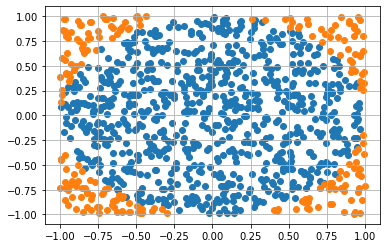

In [289]:
#let's try for with 1000 iterations

pi_estimated, inside_x, inside_y, outside_x, outside_y =pi_estimation_using_monte_carlo(1000)
print(f"for {n} iterations, the estimation of pie is{pi_estimated} whereas the actual value of pie is{np.pi},\nthe error in approximation is {abs(pi_estimated - np.pi)}")

plot_pi_estimation_monte_carlo(1000, pi_estimation_using_monte_carlo)

We will now compute the order of convergence (decreasing error rate) of monte carlo integration for pi estimation with respect to the number of iteration used (N).
For that, we will compare the error ranging from N=10 till N=10^6 , and we will plot the results on a log-log scale graph

In [290]:
#we will define a number of iterartion, and for each iteration we will calculate the relative error

N_number = np.array([10,50,100,200,300,500,1000,2000, 2500,5000,10000,30000,100000,200000,500000])
errors = np.empty(N_number.shape)

for k, n in enumerate(N_number):
    pi_estimated, inside_x, inside_y, outside_x, outside_y =pi_estimation_using_monte_carlo(n)
    error = abs(pi_estimated - np.pi)
    errors[k]=error

print(N_number, errors)

[    10     50    100    200    300    500   1000   2000   2500   5000
  10000  30000 100000 200000 500000] [0.05840735 0.10159265 0.02159265 0.08159265 0.10159265 0.10959265
 0.03359265 0.00359265 0.04080735 0.01840735 0.01480735 0.00052599
 0.00280735 0.00278735 0.00182465]


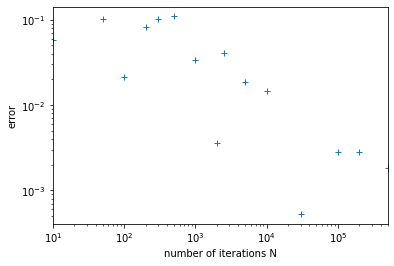

In [291]:
# we will plot now the convergence 

fig, ax = plt.subplots()
ax.loglog(N_number, errors, '+', label="pi estimation error with respect to N")
ax.set_xlim(N_number[0], N_number[-1])
ax.set_xlabel("number of iterations N")
ax.set_ylabel("error")
plt.show()

In [293]:
a, b = np.polyfit(np.log(N_number), np.log(errors), 1)

print(f"log(errors)=a*log(N_number)+b \n where a={a} and b={b} \n log(errors)={a}*log(N_number){b}")

log(errors)=a*log(N_number)+b 
 where a=-0.4360172921063456 and b=-0.7840137456769782 
 log(errors)=-0.4360172921063456*log(N_number)-0.7840137456769782


**Second Part: estimation of heart area using Monte Carlo**

We will start by plotting a heart, and then calculating it's exact area

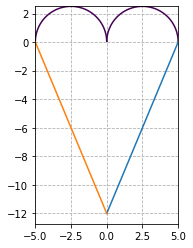

In [294]:
#we will compute now the area of a heart
#a heart can be plotted with several approaches and equations
#for this mini project, we will use a simple heart, consisting of the development of 2 demi circles upon a triangle.

#the origin of the graph is O(0,0)

#the 2 demi circles will have a radius=2.5, and of center E(-2.5 , 0) and D (2.5,0), respectively.
#the isosceles triangle will be constituted of the following 3 points: A(5,0), B(-5,0), and C(0,-12).

#we can easily carculate the equation of line of AC (y=2.4x-12) and BC(y=-2.4-12)

# the general equation of a circle is (X-X0)^2 + (Y-Y0)^2 = r^2
#in our case, the equation of circle of origin D will be (X-2.5)^2 + Y^2 = 2.5^2 and that of E will be (X+2.5)^2 + Y^2 = 2.5^2

#let's start first by defining a function of the heart equation


def plot_heart(x_A,x_B,x_D,y_D, x_E, y_E):
    y_A = 2.4*x_A -12
    y_B = -2.4*x_B -12
    
    X_D, Y_D = np.meshgrid(x_D,y_D)
    F_D = np.power((X_D-2.5),2) + np.power(Y_D,2) - np.power(2.5,2)
    
    X_E, Y_E = np.meshgrid(x_E,y_E)
    F_E = np.power((X_E+2.5),2) + np.power(Y_E,2) - np.power(2.5,2)
    
    fig, ax = plt.subplots()
  
    ax.plot(x_A,y_A)
    ax.plot(x_B,y_B)
    
    ax.contour(X_D,Y_D,F_D,[0])

    ax.contour(X_E,Y_E,F_E,[0])

    ax.set_aspect(1)
    
    plt.grid(linestyle='--')

    plt.show()
    return None
plot_line(np.linspace(0,5,100), np.linspace(-5,0,100),np.linspace(0, 5,100),np.linspace(0, 2.5,100),np.linspace(-5, 0,100),np.linspace(0, 2.5,100))



We will calculate now the exact area of this heart.
It is easily seen that this can be made by addition of areas of 2 demi circle and the area of the triangle.

In [295]:
#area of a circle = pi * r^2
#area of a demi circle= pi/2 * r^2
#area of a triangle = (base*height) /2
area_demi_circle= 0.5*np.pi*np.power(2.5,2)
area_triangle= (12*10)/2
area_heart_exact=2*area_demi_circle + area_triangle
print(f" the exact arae of the heart is {area_heart_exact}")

 the exact arae of the heart is 79.63495408493621


We will calculate now the area of heart using monte carlo integration

In [296]:
# each point enside the square will have -r<= x <=r and -r<= y <=r

#a is a point of x = a_x and y = a_y

#area of rectangle = L*H= 14.5*10=145

def heart_area_estimation_monte_carlo (NN,area_heart_exact):


    Inside=0 # number of random point that is inside the circle
    Outside=0
    
    # x and y coordinates of points that will be inside the circle
    inside_X = []
    inside_Y = []

    # x and y coordinates of points that will be outside the circle
    outside_X = []
    outside_Y = []

    for i in range (NN-1):
        a_X = random.uniform(-5,5)
        a_Y = random.uniform(-12,2.5)
        
        #let's devide our heart into 2 part, a part containing the 2 demi circles, and a part containing the triangle
        
        #a point can be inside the triangle only if it has a negative Y
        #in our case, the y of this point will be higher than the general equation of the line
        #we will calculate the number of points inside and outside the triangle and with a negative Y
        if a_Y<0:
            if a_Y<=(2.4*a_X -12) or a_Y<=(-2.4*a_X -12):
                outside_X.append(a_X)
                outside_Y.append(a_Y)
                Outside+=1
            else:
                inside_X.append(a_X)
                inside_Y.append(a_Y)
                Inside+=1
    
        #a point can be inside the demi circle only if it has a positive Y
        #in our case, the x amd y of this point will be lower than the general equation of the demi circle
        #we will calculate the number of points inside and outside the triangle and with a negative Y        
            
        if a_Y>0:
            if a_X>0:
                if  (np.power(a_X -2.5,2)+np.power(a_Y,2))<=(np.power(2.5,2)):
                    inside_X.append(a_X)
                    inside_Y.append(a_Y)
                    Inside+=1
                else:
                    outside_X.append(a_X)
                    outside_Y.append(a_Y)
                    Outside+=1
        
        
               
            if a_X<0:
                if (np.power(a_X +2.5,2)+np.power(a_Y,2))<=(np.power(2.5,2)):
                    inside_X.append(a_X)
                    inside_Y.append(a_Y)
                    Inside+=1
                else:
                    outside_X.append(a_X)
                    outside_Y.append(a_Y)
                    Outside+=1
            
    
    #the area of the rectangle which the heart is in it = length * width = 14.5*10 =145 
    
    Total = Outside+Inside
    
    #the area of the heart will be the area of rectangle * points inside the heart / total number of points (iterations)
    area_heart_monte_carlo= 145*Inside/NN
    
    error=abs(area_heart_monte_carlo-area_heart_exact)

    #print(f"the estimation area of heart is{area_heart_monte_carlo} whereas the exact area of the heart is{area_heart_exact}, the error in approximation is {error}")
    return area_heart_monte_carlo , error, inside_X, inside_Y, outside_X, outside_Y
area_heart_monte_carlo , error, inside_X, inside_Y, outside_X, outside_Y=heart_area_estimation_monte_carlo(1000,area_heart_exact)
print(area_heart_monte_carlo)

81.055


we will now define a function to plot the heart using monte carlo

In [297]:
def plot_heart_area_estimation_monte_carlo (NN, heart_area_estimation_monte_carlo):
    area_heart_monte_carlo , error, inside_X, inside_Y, outside_X, outside_Y =heart_area_estimation_monte_carlo(NN, area_heart_exact)
    plt.scatter(inside_X, inside_Y)
    plt.scatter(outside_X, outside_Y)
    plt.grid()
    return None

We will take now an example for pi estimation using Monte Carlo

for 1000 iterations, the estimation of area of heart is78.3 whereas the actual value of pie is79.63495408493621, the error in approximation is 1.3349540849362143


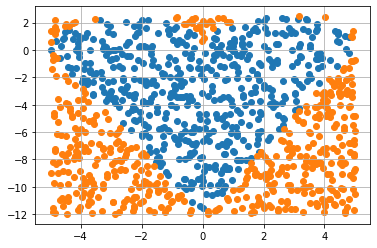

In [298]:
#let's try for with 1000 iterations

NN=1000
area_heart_monte_carlo , error, inside_X, inside_Y, outside_X, outside_Y =heart_area_estimation_monte_carlo(1000, area_heart_exact)
print(f"for {NN} iterations, the estimation of area of heart is{area_heart_monte_carlo} whereas the actual value of pie is{area_heart_exact}, the error in approximation is {abs(area_heart_monte_carlo - area_heart_exact)}")

plot_heart_area_estimation_monte_carlo(1000, heart_area_estimation_monte_carlo)

We will now compute the order of convergence (decreasing error rate) of monte carlo integration for heart aera estimation with respect to the number of iteration used (NN).
For that, we will compare the error ranging from NN=10 till NN=10^6 , and we will plot the results on a log-log scale graph

In [299]:
#we will define a number of iterartion, and for each iteration we will calculate the relative error

NN_number = np.array([10,50,100,200,300,500,1000,2000, 2500,5000,10000,30000,100000,200000,500000])
Errors = np.empty(NN_number.shape)
for K, n in enumerate(NN_number):
    area_heart_monte_carlo , error, inside_X, inside_Y, outside_X, outside_Y = heart_area_estimation_monte_carlo(n, area_heart_exact)
    Errors[K]=error

print(NN_number, Errors)

[    10     50    100    200    300    500   1000   2000   2500   5000
  10000  30000 100000 200000 500000] [ 7.36504592 10.03495408 13.16504592  7.13495408  0.36828742  0.75495408
  0.11504592  2.36254592  0.17495408  0.72595408  0.94154592  0.24554592
  0.21990408  0.20857092  0.10866592]


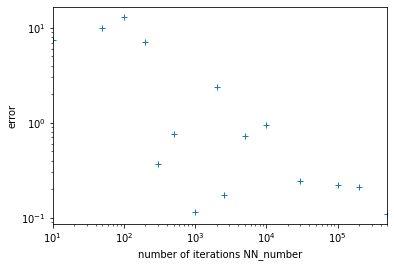

In [300]:
#we will plot now the convergence 
    
fig, ax = plt.subplots()
ax.loglog(NN_number, Errors, '+', label="heart area estimation using monte carlo")
ax.set_xlim(NN_number[0], NN_number[-1])
ax.set_xlabel("number of iterations NN_number")
ax.set_ylabel("error")
plt.show()

In [301]:
a, b = np.polyfit(np.log(NN_number), np.log(errors),1)

print(f"log(Errors)=a*log(NN_number)+b \n where a={a} and b={b} \n log(Errors)={a}*log(NN_number){b}")

log(Errors)=a*log(NN_number)+b 
 where a=-0.4360172921063456 and b=-0.7840137456769782 
 log(Errors)=-0.4360172921063456*log(NN_number)-0.7840137456769782


**Third part: comparing monte carlo integration to exact integration, left rectangular method, Simpson ,respectively.**

We will calculate **the exact integration** value of a function

In [302]:
#let's choose a random function f(x)
# f(x) = e^x+x^2 + x
#it's respective primitive will be F(x)
# F(x) = e^x+(x^3)/3 + (x^2)/2
# from 4 to 12
def func(x):
    return np.exp(x) + np.power(x,2) + x

def integration(x):
    return np.exp(x) + np.power(x,3)/3 + np.power(x,2)/2

#the limits that we are working in
a=4
b=7

solution_exact = integration(b) - integration(a)

print (f" the exact solution of the integration is{solution_exact}")

 the exact solution of the integration is1151.5350083953142


We will estimate the solution now using **monte carlo**

In [303]:
#N=10000 #iteration
#for this part, for solving monte carlo, we will assume that the solution of an integral of boundaries 'a' and 'b',
#will be the average of integrals addition at a random point 'c' ranging between 'a' and 'b', for a given number of iterations N.

a=4
b=7
def monte_carlo(x,y,N):  
    total=0
    for i in range(N-1):
        c = random.uniform(x,y)
        total += func(c) 
        
    result_monte_carlo = ((y-x)/N)*total
    return result_monte_carlo

solution_monte_carlo = monte_carlo(a,b,10000)
print(f" the solution using monte carlo integration is {solution_monte_carlo}, the exact solution is {solution_exact}, and the error is {abs(solution_exact-solution_monte_carlo)}")

 the solution using monte carlo integration is 1163.2041527543931, the exact solution is 1151.5350083953142, and the error is 11.669144359078928


We will now compute the order of convergence (decreasing error rate) of monte carlo integration for f(x) integration estimation with respect to the number of iteration used (N).
For that, we will compare the error ranging from N=10 till N=10^6 , and we will plot the results on a log-log scale graph

In [305]:
#we will define a number of iterartion, and for each iteration we will calculate the relative error

N_number = np.array([10,50,100,200,300,500,1000,2000, 2500,5000,10000,30000,100000,200000,500000])
errors = np.empty(N_number.shape)

for k, n in enumerate(N_number):
    result_monte_carlo =monte_carlo(a,b,n)
    error = abs(result_monte_carlo - solution_exact)
    errors[k]=error

print(N_number, errors)

[    10     50    100    200    300    500   1000   2000   2500   5000
  10000  30000 100000 200000 500000] [3.62011157e+02 8.18605757e+01 2.95027209e+01 4.42560585e+01
 1.82006711e+01 4.40100852e+01 6.31158001e+00 1.09004623e+01
 1.00412363e+01 2.28495443e+01 8.17973052e+00 9.96842818e-01
 7.40682978e-01 8.72205403e-01 6.67163222e-02]


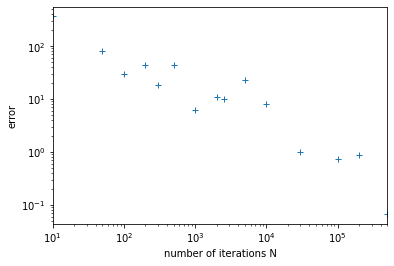

In [306]:
# we will plot now the convergence 

fig, ax = plt.subplots()
ax.loglog(N_number, errors, '+', label="monte carlo F(x) estimation error with respect to N")
ax.set_xlim(N_number[0], N_number[-1])
ax.set_xlabel("number of iterations N")
ax.set_ylabel("error")

plt.show()

In [307]:
a, b = np.polyfit(np.log(N_number), np.log(errors), 1)

print(f"log(errors)=a*log(N_number)+b \n where a={a} and b={b} \n log(N_number)={a}*log(dts)+{b}")

log(errors)=a*log(N_number)+b 
 where a=-0.6519139845465773 and b=7.1939534188860526 
 log(N_number)=-0.6519139845465773*log(dts)+7.1939534188860526


We will estimate the solution using **the left rectangular method**

In [308]:
def left_rect_meth(x, func):
    """ Function to approximate an integral using the left rectangle method.
    Computations will be realized using a for-loop.
    
    Parameters
    ----------
    x : numpy array
        Array representing the discretization of the integration domain
    func  : python function
        Function to be integrated
    
    Output
    ----------
    I : float
        Approached integral computed
    """

    I = 0
    N = (x.size)
    for i in range(N - 1):
        I += (x[i + 1] - x[i]) * func(x[i])
    return I
#a=4
#b=7
solution_left_rect_meth= left_rect_meth(np.linspace(4,7,50),func)

print(f" the solution using monte carlo integration is {solution_left_rect_meth}, the exact solution is {solution_exact}, and the error is {abs(solution_exact-solution_left_rect_meth)}")

 the solution using monte carlo integration is 1118.8612909103292, the exact solution is 1151.5350083953142, and the error is 32.67371748498499


We will now compute the order of convergence (decreasing error rate) of LRM integration for f(x) integration estimation with respect to the number of iteration used (N).
For that, we will compare the error ranging from N=10 till N=10^6 , and we will plot the results on a log-log scale graph

In [309]:
# Prepare a set of discretization on which to operate
NN = [np.power(10, x) for x in np.linspace(1, 3.5, 20)]
errs = np.zeros(len(NN))
hs = np.zeros(len(NN))

a,b = 4 ,7 #our boundaries

# Loop over the discretizations to compute errors
for k, n in enumerate(NN):
    disc = np.linspace(a, b, int(n))
    hs[k] = disc[1] - disc[0]
    Ia = left_rect_meth(disc, func)
    errs[k] = np.abs(Ia - solution_exact)

print(hs, errs)

[0.33333333 0.25       0.17647059 0.13043478 0.09375    0.06818182
 0.05       0.03658537 0.02702703 0.01986755 0.01463415 0.01075269
 0.00793651 0.00585938 0.00432277 0.00319149 0.00235664 0.00174014
 0.00128535 0.00094907] [169.98629395 129.30150538  92.40232455  68.82117779  49.76539903
  36.34521944  26.73254363  19.60325657  14.50424577  10.67448394
   7.86935733   5.78578932   4.27241556   3.15530724   2.32841486
   1.71937906   1.26978402   0.93770103   0.69268027   0.51148493]


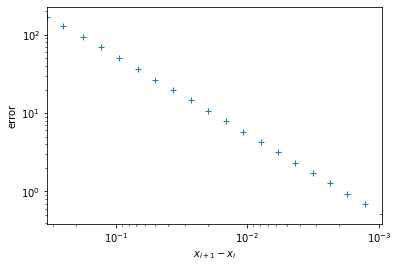

In [310]:
# we will plot now the convergence 

fig, ax = plt.subplots()
ax.loglog(hs, errs, '+', label="LRM F(x) estimation error with respect to N")
ax.set_xlim(hs[0], hs[-1])
ax.set_xlabel("$x_{i+1}-x_i$")
ax.set_ylabel("error")
plt.show()

In [311]:
a, b = np.polyfit(np.log(hs), np.log(errs), 1)

print(f"log(errs)=a*log(Xi+1 - Xi)+b \n where a={a} and b={b} \n log(errs)={a}*log(Xi+1 - Xi)+{b}")

log(errs)=a*log(Xi+1 - Xi)+b 
 where a=0.9931495504534779 and b=6.251784818331715 
 log(errs)=0.9931495504534779*log(Xi+1 - Xi)+6.251784818331715


We will estimate the solution using **Simpson**

In [312]:
def Simpson(x, func):
    """ Function to approximate an integral using the Simpson's rule.
    \int_a^b f(x) dx ~= (b-a)*(f(a)/6 + 4/6*f((a+b)/2) +f(b)/6)
    
    Parameters
    ----------
    x : numpy array
        Array representing the discretization of the integration domain
    func  : python function
        Function to be integrated
    
    Output
    ----------
    I : float
        Approached integral computed
    """

    I = 0
    N = (x.size)
    for i in range(N - 1):
        T1 = func(x[i])
        T2 = func((x[i + 1] + x[i]) / 2)
        T3 = func(x[i + 1])
        I += (x[i + 1] - x[i]) * (T1 / 6 + 2 * T2 / 3 + T3 / 6)
    return I

#a=4
#b=7
solution_simpson=Simpson(np.linspace(4,7,50),func)

print(f" the solution using monte carlo integration is {solution_simpson}, the exact solution is {solution_exact}, and the error is {abs(solution_exact-solution_simpson)}")

 the solution using monte carlo integration is 1151.5350134785713, the exact solution is 1151.5350083953142, and the error is 5.083257065052749e-06


We will now compute the order of convergence (decreasing error rate) of simpson integration for f(x) integration estimation with respect to the number of iteration used (N).
For that, we will compare the error ranging from N=10 till N=10^6 , and we will plot the results on a log-log scale graph

In [313]:
# Prepare a set of discretization on which to operate
NN = [np.power(10, x) for x in np.linspace(1, 3.5, 20)]
errs = np.zeros(len(NN))
hs = np.zeros(len(NN))

a,b = 4 ,7 #our boundaries
# Loop over the discretizations to compute errors
for k, n in enumerate(NN):
    disc = np.linspace(a, b, int(n))
    hs[k] = disc[1] - disc[0]
    Ia = Simpson(disc, func)
    errs[k] = np.abs(Ia - solution_exact)
    #if errs[k]==0:
        
        

print(hs, errs)

[0.33333333 0.25       0.17647059 0.13043478 0.09375    0.06818182
 0.05       0.03658537 0.02702703 0.01986755 0.01463415 0.01075269
 0.00793651 0.00585938 0.00432277 0.00319149 0.00235664 0.00174014
 0.00128535 0.00094907] [4.45215684e-03 1.41072574e-03 3.50571637e-04 1.04675161e-04
 2.79422477e-05 7.81815106e-06 2.26119232e-06 6.48190053e-07
 1.93051847e-07 5.63720732e-08 1.65944130e-08 4.83669282e-09
 1.43518264e-09 4.27235136e-10 1.25737643e-10 3.68345354e-11
 1.04591891e-11 2.95585778e-12 4.54747351e-13 4.54747351e-13]


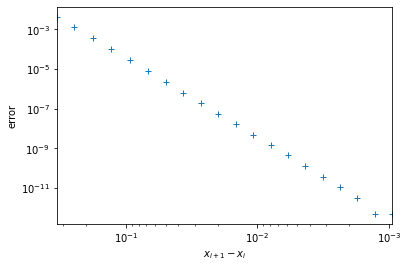

In [314]:
# we will plot now the convergence 

fig, ax = plt.subplots()
ax.loglog(hs, errs, '+', label="simpson F(x) estimation error with respect to N")
ax.set_xlim(hs[0], hs[-1])
ax.set_xlabel("$x_{i+1}-x_i$")
ax.set_ylabel("error")
plt.show()


In [315]:
a, b = np.polyfit(np.log(hs), np.log(errs), 1)

print(f"log(errs)=a*log(Xi+1 - Xi)+b \n where a={a} and b={b} \n log(errs)={a}*log(Xi+1 - Xi)+{b}")

log(errs)=a*log(Xi+1 - Xi)+b 
 where a=4.018331950880746 and b=-0.9696593850577723 
 log(errs)=4.018331950880746*log(Xi+1 - Xi)+-0.9696593850577723


In [316]:
print("we conclude that, for a sufficient amount of iterations, monte carlo is more efficient than the left rectangular method,\nbut simpson is more efficient than monte carlo")

we conclude that, for a sufficient amount of iterations, monte carlo is more efficient than the left rectangular method,
but simpson is more efficient than monte carlo


**Fourth part: time needed in monte carlo**

In this last part, we will compare the accuracy of solution given by monte carlo, with the time needed for each defined number of iteration.

In [318]:
# we will compare 3 cases, 10000 iterations, 100000 iterations, 1000000 iterations
a,b =4,7
def elapsed_time_loop_monte_carlo(N):
    start = time.time()
    solution_monte_carlo = monte_carlo(a,b,N)
    end = time.time()
    elapsed_time_loop = end - start

    print(f"for {N} iterations, the solution using monte carlo integration is {solution_monte_carlo}, the exact solution is {solution_exact},\nand the error is {abs(solution_exact-solution_monte_carlo)} and it took {elapsed_time_loop}\n\n")
    
    return None

elapsed_time_loop_monte_carlo(10000)
elapsed_time_loop_monte_carlo(100000)
elapsed_time_loop_monte_carlo(1000000)

for 10000 iterations, the solution using monte carlo integration is 1159.5902897849335, the exact solution is 1151.5350083953142,
and the error is 8.055281389619267 and it took 0.1004629135131836


for 100000 iterations, the solution using monte carlo integration is 1154.3830556616902, the exact solution is 1151.5350083953142,
and the error is 2.848047266375943 and it took 0.4888458251953125


for 1000000 iterations, the solution using monte carlo integration is 1151.2645285166918, the exact solution is 1151.5350083953142,
and the error is 0.2704798786223819 and it took 4.453984260559082




In [319]:
print("As you can see, the more we increase the number of iteration, the more the error decreases,\nbut the elapsed time loop will increases! ")

As you can see, the more we increase the number of iteration, the more the error decreases,
but the elapsed time loop will increases! 
